# Capstone project

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Data Cleaning](#cleaning_data)
* [Exploratory Data Analysis](#eda)
* [Model](#model)
* [Analysis with location](#location)

## Introduction: Business Problem <a name="introduction"></a>

Coyoacan is a delegation from Mexico City that is growing economically every year. In addition to this, the culture that exists in this place is attractive to encourage people to live here. Coyoacan is a place full of history and traditions, it has the neighborhoods of the town of Los Reyes, San Pedro Tepetlapa, La Candelaria, San Francisco Culhuacán, Santa Úrsula Coapa, San Francisco, El Niño Jesús, La Conchita, San Lucas, Santa Catarina. For these reasons, any company with sufficient capital should consider building apartments in this zone. 

In this project we will try to analyze which of these neighborhoods is the best option to consider investing in real estate construction. With the power of machine learning, there will be a projection of the growth of the population in this place, and therefore of the economy and the possibilities of generating profits through the collection of rents. Likewise, an attempt will be made to project through data science which neighborhood is the best option, considering that the region with the greatest number of shops and cultural places will generate the most interest.

## Data <a name="data"></a>

Based on the business problem we will obtain through webscrapping the data on the rental prices of the apartments in the Coyoacan area, we will also use the Foursquare location to obtain the information of each of the neighborhoods about the shops and cultural places, since the existence of these places in the area where the apartments will be built will have a great influence on the rental costs and the interest of people to live in these places.

### Prices of apartments in Coyoacan zone

In [ ]:
#!pip install scrapy

     |████████████████████████████████| 254 kB 4.0 MB/s 
     |████████████████████████████████| 3.2 MB 38.1 MB/s 
     |████████████████████████████████| 251 kB 69.5 MB/s 
     |████████████████████████████████| 47 kB 4.6 MB/s 
     |████████████████████████████████| 3.6 MB 39.6 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 3.1 MB 10.4 MB/s 
     |████████████████████████████████| 65 kB 3.8 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
  Created wheel for protego: filename=Protego-0.1.16-py3-none-any.whl size=7782 sha256=700aa30373e0c40387d753b70e418e43b7e7f53c39dd9a2a1ceb4ece3065cf4e
  Stored in directory: /root/.cache/pip/wheels/ca/44/01/3592ccfbcfaee4ab297c4097e6e9dbe1c7697e3531a39877ab
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11515 sha256=8fef76e826d775097121501871e896c92b24a78999e99d0042a13d68b695bc7c
  Stored in directory: /root/.cache/pip/wheels/2d/18/21/3c6a732eaa

In [ ]:
# importing dependences
from scrapy.item import Field
from scrapy.item import  Item
from scrapy.spiders import CrawlSpider, Rule, Spider
from scrapy.selector import  Selector
from scrapy.loader.processors import MapCompose
from scrapy.linkextractors import LinkExtractor
from scrapy.loader import ItemLoader
from scrapy.crawler import CrawlerProcess

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

We will apply webscrapping with scrapy to obtain the data from the mercadolibre page. This page has information about prices for renting and selling apartments.

In [ ]:
class Apartment(Item):
    price = Field()
    ubication  = Field()
    rooms = Field()
    size = Field()
    bathrooms = Field()
    parking = Field()
    years = Field()

In [ ]:
class apartmentSpider(CrawlSpider):

    name = 'apartment'
    
    custom_settings = {        
        'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
        #'CLOSESPIDER_PAGECOUNT': 40
    }
    
    allowed_domains = ['listado.mercadolibre.com.mx', 'departamento.mercadolibre.com.mx']
    start_urls = ['https://listado.mercadolibre.com.mx/departamento-en-venta-coyoacan#D[A:departamento%20en%20venta%20coyoacan]']
    
    download_delay = 1

    rules = (
        Rule (
            LinkExtractor(
                allow =r'departamento-en-venta-coyoacan_Desde_'
            ), follow = True
        ),

        Rule (
            LinkExtractor(
                allow = r'/MLM-'
            ),  follow=True, callback='parse'
        )
    )

    def parse(self, response):
        sel = Selector(response)

        item = ItemLoader(Apartment(), sel)
        item.add_xpath('price', '//span[@class="price-tag-fraction"]/text()')
        item.add_xpath('ubication', '//div[@class="ui-vip-location"]//p[@class="ui-pdp-color--BLACK ui-pdp-size--SMALL ui-pdp-family--REGULAR ui-pdp-media__title"]/text()')
        item.add_xpath('rooms', '//div[@class="ui-pdp-specs__table"]/table/tbody/tr[3]/td/span[@class="andes-table__column--value"]/text()')
        item.add_xpath('size', '//div[@class="ui-pdp-specs__table"]/table/tbody/tr[2]/td/span[@class="andes-table__column--value"]/text()')
        item.add_xpath('bathrooms', '//div[@class="ui-pdp-specs__table"]/table/tbody/tr[4]/td/span[@class="andes-table__column--value"]/text()')
        item.add_xpath('parking', '//div[@class="ui-pdp-specs__table"]/table/tbody/tr[5]/td/span[@class="andes-table__column--value"]/text()')
        item.add_xpath('years', '//div[@class="ui-pdp-specs__table"]/table/tbody/tr[7]/td/span[@class="andes-table__column--value"]/text()')

        yield item.load_item()


We will save the data in results_apartments.csv file.

In [ ]:
process = CrawlerProcess({
    'FEED_FORMAT' : 'csv',
    'FEED_URI' : 'results_apartments.csv'
})

process.crawl(apartmentSpider)
process.start()

2021-12-07 07:16:24 [scrapy.utils.log] INFO: Scrapy 2.5.1 started (bot: scrapybot)
2021-12-07 07:16:24 [scrapy.utils.log] INFO: Versions: lxml 4.2.6.0, libxml2 2.9.8, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.7.0, Python 3.7.12 (default, Sep 10 2021, 00:21:48) - [GCC 7.5.0], pyOpenSSL 21.0.0 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 36.0.0, Platform Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
2021-12-07 07:16:24 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2021-12-07 07:16:24 [scrapy.crawler] INFO: Overridden settings:
{'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}
2021-12-07 07:16:24 [scrapy.extensions.telnet] INFO: Telnet Password: 8102651f3b89b531
2021-12-07 07:16:24 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusag

Transforming in a data frame

In [ ]:

df_prices = pd.read_csv('results_apartments.csv')
df_prices.head()

,bathrooms,parking,price,rooms,size,ubication,years
0,2,1,"2,800,000",3.0,109 m²,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",1 años
1,3,3,"7,760,936",3.0,109 m²,"Avenida Universidad, Barrio Oxtopulco Universi...",Loft
2,3,3,"5,926,349",3.0,114 m²,"Avenida Universidad, Barrio Oxtopulco Universi...",Loft
3,1,1,"2,367,000",2.0,60 m²,"Anacahuita 90, Pedregal De Santo Domingo, Coyo...",4
4,3,3,"6,143,431",3.0,134 m²,"Avenida El Bordo, Pueblo de Santa Ursula Coapa...",Loft


In [ ]:
df_prices.shape

(290, 7)

# Data Cleaning <a name="cleaning_data"></a>

We are going to apply some techniques to clean the data. Frist we will rename size column to size_m2.

In [ ]:
df_prices = df_prices.rename(columns = {'size': 'size_m2'})

In [ ]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  284 non-null    object 
 1   parking    263 non-null    object 
 2   price      290 non-null    object 
 3   rooms      287 non-null    float64
 4   size_m2    290 non-null    object 
 5   ubication  290 non-null    object 
 6   years      181 non-null    object 
dtypes: float64(1), object(6)
memory usage: 16.0+ KB


Years column has many null values, lets explore it


In [ ]:
df_prices['years'].value_counts()

0 años      118
1            12
4             7
Loft          7
5             5
2             5
3             5
36 años       2
Frente        2
1 años        2
26 años       1
25 años       1
5 años        1
21 años       1
6             1
Poniente      1
1000 MXN      1
Norte         1
11 años       1
2 años        1
Oriente       1
7             1
2000 MXN      1
8             1
0 MXN         1
27            1
Name: years, dtype: int64

The years columns in the data frame have a lot of null values ​​and cells with mistakes, so this column doesn't have a lot of important information. Lets drop this column.

In [ ]:
df_prices = df_prices.drop('years', axis = 1)
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  284 non-null    object 
 1   parking    263 non-null    object 
 2   price      290 non-null    object 
 3   rooms      287 non-null    float64
 4   size_m2    290 non-null    object 
 5   ubication  290 non-null    object 
dtypes: float64(1), object(5)
memory usage: 13.7+ KB


we are going to remove ',' at price column, to convert it to float type

In [ ]:
# 
for i in range(len(df_prices)):
  df_prices['price'][i] = df_prices['price'][i].replace(',', '')

df_prices

,bathrooms,parking,price,rooms,size_m2,ubication
0,2,1,2800000,3.0,109 m²,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán..."
1,3,3,7760936,3.0,109 m²,"Avenida Universidad, Barrio Oxtopulco Universi..."
2,3,3,5926349,3.0,114 m²,"Avenida Universidad, Barrio Oxtopulco Universi..."
3,1,1,2367000,2.0,60 m²,"Anacahuita 90, Pedregal De Santo Domingo, Coyo..."
4,3,3,6143431,3.0,134 m²,"Avenida El Bordo, Pueblo de Santa Ursula Coapa..."
...,...,...,...,...,...,...
285,3,2,19500,3.0,108 m²,"Pacifico 155, Pueblo de los Reyes, Coyoacán, D..."
286,2,1,2999000,2.0,92 m²,"Teponaxtli, Adolfo Ruiz Cortines, Coyoacán, Di..."
287,3,1,2900000,2.0,80 m²,"Eje 10 Sur 314, Pedregal De Santo Domingo, Coy..."
288,2,2,22000,4.0,113 m²,"Calz Tlalpan, Santa Ursula Coapa, Coyoacán, Di..."


There are some rows with errors. For example in some rows appears '0 años' at bathrooms column. We will remove this erros. Let begin remove 'm^2' from size_m2 column.

In [ ]:
# We will eliminate 'm2 in size_m2 column
for i in range(len(df_prices)):
  split = df_prices['size_m2'][i].split(' ')
  if len(split) == 2:
    df_prices['size_m2'][i] = split[0]
  else:
     df_prices = df_prices.drop(i, axis = 0)

df_prices


,bathrooms,parking,price,rooms,size_m2,ubication
0,2,1,2800000,3.0,109,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán..."
1,3,3,7760936,3.0,109,"Avenida Universidad, Barrio Oxtopulco Universi..."
2,3,3,5926349,3.0,114,"Avenida Universidad, Barrio Oxtopulco Universi..."
3,1,1,2367000,2.0,60,"Anacahuita 90, Pedregal De Santo Domingo, Coyo..."
4,3,3,6143431,3.0,134,"Avenida El Bordo, Pueblo de Santa Ursula Coapa..."
...,...,...,...,...,...,...
285,3,2,19500,3.0,108,"Pacifico 155, Pueblo de los Reyes, Coyoacán, D..."
286,2,1,2999000,2.0,92,"Teponaxtli, Adolfo Ruiz Cortines, Coyoacán, Di..."
287,3,1,2900000,2.0,80,"Eje 10 Sur 314, Pedregal De Santo Domingo, Coy..."
288,2,2,22000,4.0,113,"Calz Tlalpan, Santa Ursula Coapa, Coyoacán, Di..."


Now, we are going to replace with 0 all the null values.

In [ ]:
# tratment of null value
df_prices['parking'].fillna(0, inplace = True)
df_prices['bathrooms'].fillna(0, inplace = True)
df_prices['rooms'].fillna(0, inplace = True)
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 289
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  257 non-null    object 
 1   parking    257 non-null    object 
 2   price      257 non-null    object 
 3   rooms      257 non-null    float64
 4   size_m2    257 non-null    object 
 5   ubication  257 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.1+ KB


In [ ]:
df_prices = df_prices.reset_index()


In [ ]:
df_prices.drop('index', axis = 1, inplace = True)

We will convert columns object type to numeric type


In [ ]:
feat = ['bathrooms', 'parking', 'price', 'rooms', 'size_m2']

for f in feat:
  for i in range(len(df_prices)):
    try:
      df_prices[f][i] = float(df_prices[f][i])
    except:
      df_prices[f][i] = 0
 



In [ ]:
df_prices[feat] = df_prices[feat].astype(float)
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  257 non-null    float64
 1   parking    257 non-null    float64
 2   price      257 non-null    float64
 3   rooms      257 non-null    float64
 4   size_m2    257 non-null    float64
 5   ubication  257 non-null    object 
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


We will obtain the latitude and longitude for every ubication in our dataset

In [ ]:
from geopy.geocoders import Nominatim 

df_prices['lat'] = 0.
df_prices['lon'] = 0.

for i in range(len(df_prices)):

  try:
    loc = Nominatim(user_agent="GetLoc") 
    getLoc = loc.geocode(df_prices['ubication'][i]) 
    df_prices['lat'][i] = getLoc.latitude
    df_prices['lon'][i] = getLoc.longitude
  except:
    df_prices['lat'][i] = 0
    df_prices['lon'][i] = 0
 



In [ ]:
df_prices

,bathrooms,parking,price,rooms,size_m2,ubication,lat,lon
0,2.0,1.0,2800000.0,3.0,109.0,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",19.331492,-99.153093
1,3.0,3.0,7760936.0,3.0,109.0,"Avenida Universidad, Barrio Oxtopulco Universi...",19.349973,-99.179581
2,3.0,3.0,5926349.0,3.0,114.0,"Avenida Universidad, Barrio Oxtopulco Universi...",19.349973,-99.179581
3,1.0,1.0,2367000.0,2.0,60.0,"Anacahuita 90, Pedregal De Santo Domingo, Coyo...",19.330583,-99.171340
4,3.0,3.0,6143431.0,3.0,134.0,"Avenida El Bordo, Pueblo de Santa Ursula Coapa...",0.000000,0.000000
...,...,...,...,...,...,...,...,...
252,3.0,2.0,19500.0,3.0,108.0,"Pacifico 155, Pueblo de los Reyes, Coyoacán, D...",19.339131,-99.151180
253,2.0,1.0,2999000.0,2.0,92.0,"Teponaxtli, Adolfo Ruiz Cortines, Coyoacán, Di...",0.000000,0.000000
254,3.0,1.0,2900000.0,2.0,80.0,"Eje 10 Sur 314, Pedregal De Santo Domingo, Coy...",0.000000,0.000000
255,2.0,2.0,22000.0,4.0,113.0,"Calz Tlalpan, Santa Ursula Coapa, Coyoacán, Di...",0.000000,0.000000


We can see that there are some rows with no information about the longitude and latitude

In [ ]:
counterFunc = df_prices['lat'].apply(
    lambda x: True if x == 0. else False)
numOfRows = len(counterFunc[counterFunc == True].index)
print('There are exactly {} rows with no information about lat and lon'.format(numOfRows))

There are exactly 110 rows with no information about lat and lon


We will extract a data frame with no zero location. This because later, we are going to analyze the data by location, and we need latitude and longitude. 

In [ ]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  257 non-null    float64
 1   parking    257 non-null    float64
 2   price      257 non-null    float64
 3   rooms      257 non-null    float64
 4   size_m2    257 non-null    float64
 5   ubication  257 non-null    object 
 6   lat        257 non-null    float64
 7   lon        257 non-null    float64
dtypes: float64(7), object(1)
memory usage: 16.2+ KB


# Exploratory Data Analysis <a name="eda"></a>

Lets get some statistics from the data.

In [ ]:
df_prices.describe()

,bathrooms,parking,price,rooms,size_m2,lat,lon
count,257.000000,257.000000,2.570000e+02,257.000000,257.000000,257.000000,257.000000
mean,1.984436,1.618677,2.381262e+06,3.280156,91.152568,11.054974,-56.716894
std,0.739346,0.919898,2.456172e+06,1.424985,43.238549,9.581696,49.158285
min,0.000000,0.000000,3.500000e+03,0.000000,10.000000,0.000000,-99.192638
25%,2.000000,1.000000,1.950000e+04,2.000000,64.000000,0.000000,-99.163095
50%,2.000000,2.000000,2.100000e+06,3.000000,80.000000,19.305854,-99.133834
75%,2.000000,2.000000,3.590000e+06,4.000000,110.000000,19.330492,0.000000
max,5.000000,9.000000,1.600000e+07,10.000000,300.000000,19.356100,0.000000


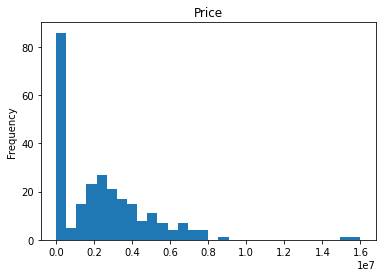

In [264]:
df_prices['price'].plot.hist(bins = 30)
plt.title('Price')
plt.show()

We can see that there are a great variance in the price column, this can be because, in the data are included apartments for rent and for sale, and obviously the prices for both are extremly different.

Dropping apartment for rent

In [ ]:

df_prices_rent = df_prices[df_prices['price'] < 100000 ].reset_index().drop('index', axis = 1)
df_prices_rent

,bathrooms,parking,price,rooms,size_m2,ubication,lat,lon
0,2.0,2.0,19500.0,4.0,75.0,"Boulevard Adolfo Ruiz Cortines, Pedregal De Ca...",0.000000,0.000000
1,2.0,2.0,14000.0,4.0,76.0,"Tlalpan, Parque San Andrés, Coyoacán, Distrito...",19.349979,-99.145437
2,1.0,1.0,14000.0,2.0,50.0,"Ciclistas, Churubusco Country Club, Coyoacán, ...",0.000000,0.000000
3,1.0,1.0,7000.0,2.0,24.0,"Luis Martínez, Romero De Terreros, Coyoacán, D...",0.000000,0.000000
4,2.0,2.0,12100.0,4.0,60.0,"Paseo De Las Higueras, Paseos De Taxqueña, Coy...",0.000000,0.000000
...,...,...,...,...,...,...,...,...
81,3.0,2.0,17500.0,5.0,125.0,"Insurgentes Cuicuilco, Coyoacán, Distrito Federal",19.305854,-99.190062
82,1.0,0.0,11500.0,3.0,87.0,"Avenida Universidad 1900, Oxtopulco Universid...",19.338103,-99.182827
83,3.0,2.0,19500.0,3.0,108.0,"Pacifico 155, Pueblo de los Reyes, Coyoacán, D...",19.339131,-99.151180
84,2.0,2.0,22000.0,4.0,113.0,"Calz Tlalpan, Santa Ursula Coapa, Coyoacán, Di...",0.000000,0.000000


In fact, there are several rows with information about apartments for rent. It would be worth adding a label indicating whether the apartment is for rent or for sale. Let's do that.

In [ ]:
df_prices['for_sale'] = df_prices['price'].apply( lambda x: 0 if x < 100000 else 1)
df_prices 

,bathrooms,parking,price,rooms,size_m2,ubication,lat,lon,for_sale
0,2.0,1.0,2800000.0,3.0,109.0,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",19.331492,-99.153093,1
1,3.0,3.0,7760936.0,3.0,109.0,"Avenida Universidad, Barrio Oxtopulco Universi...",19.349973,-99.179581,1
2,3.0,3.0,5926349.0,3.0,114.0,"Avenida Universidad, Barrio Oxtopulco Universi...",19.349973,-99.179581,1
3,1.0,1.0,2367000.0,2.0,60.0,"Anacahuita 90, Pedregal De Santo Domingo, Coyo...",19.330583,-99.171340,1
4,3.0,3.0,6143431.0,3.0,134.0,"Avenida El Bordo, Pueblo de Santa Ursula Coapa...",0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...
252,3.0,2.0,19500.0,3.0,108.0,"Pacifico 155, Pueblo de los Reyes, Coyoacán, D...",19.339131,-99.151180,0
253,2.0,1.0,2999000.0,2.0,92.0,"Teponaxtli, Adolfo Ruiz Cortines, Coyoacán, Di...",0.000000,0.000000,1
254,3.0,1.0,2900000.0,2.0,80.0,"Eje 10 Sur 314, Pedregal De Santo Domingo, Coy...",0.000000,0.000000,1
255,2.0,2.0,22000.0,4.0,113.0,"Calz Tlalpan, Santa Ursula Coapa, Coyoacán, Di...",0.000000,0.000000,0


Here 1 indicates that the apartment is for sale and o for rent.

Next, we are going to visualize the information for both categories.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Is For sale?

In [ ]:
for_sale = df_prices['for_sale'].value_counts().to_frame().reset_index()
for_sale

,index,for_sale
0,1,171
1,0,86


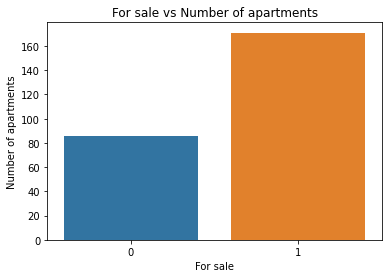

In [ ]:
p = sns.barplot(x = 'index', y = 'for_sale', data = for_sale)
p.set(title = 'For sale vs Number of apartments', xlabel = 'For sale', ylabel = 'Number of apartments'  )
plt.show()

Although there are a large number of apartments for sale, the number of apartments for rent is not negligible, so both categories will be considered for the analysis.

Bathrooms

In [ ]:
num_bath = df_prices[['for_sale','bathrooms']].value_counts().to_frame().reset_index()
num_bath.rename(columns = {0: 'Total'}, inplace = True)

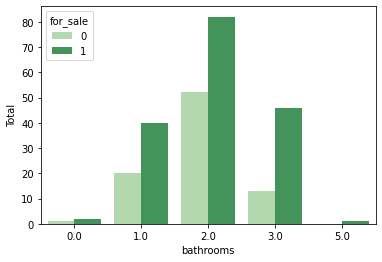

In [ ]:
sns.barplot(x="bathrooms", y='Total', 
            hue="for_sale", data=num_bath, 
            palette='Greens')
plt.show()

We can see that the most of apartments have 1,2 or 3 bathrooms.

Parking places

In [ ]:
num_parking = df_prices[['for_sale','parking']].value_counts().to_frame().reset_index()
num_parking.rename(columns = {0: 'Total'}, inplace = True)

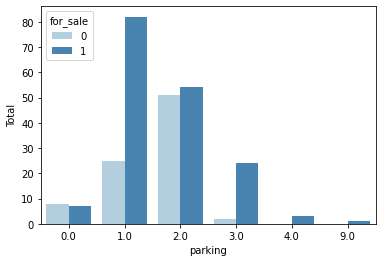

In [ ]:
sns.barplot(x="parking", y='Total', 
            hue="for_sale", data=num_parking, 
            palette='Blues')
plt.show()

We can see that the most of apartments have 1, 2  parking places.

Rooms


In [ ]:
num_rooms = df_prices[['for_sale','rooms']].value_counts().to_frame().reset_index()
num_rooms.rename(columns = {0: 'Total'}, inplace = True)

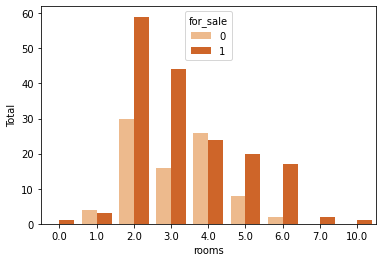

In [ ]:
sns.barplot(x="rooms", y='Total', 
            hue="for_sale", data=num_rooms, 
            palette='Oranges')
plt.show()


We can see that most of the apartments for sale have 2 or 3 rooms. While the number of rooms for apartments for rent is distributed more evenly between 2 and 5 rooms.

Size of apartments

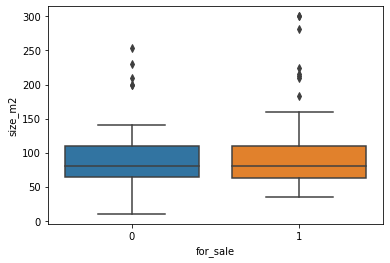

In [ ]:
sns.boxplot(x = 'for_sale', y = 'size_m2', data = df_prices)
plt.show()

WE can see that the size of apartments are in the same range for both, rent and sale. There are some outliers, these will be consider in the analysis.

Price of apartments

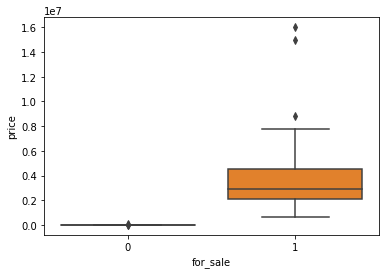

In [ ]:
sns.boxplot(x = 'for_sale', y = 'price', data = df_prices)
plt.show()


In fact, the price between the two categories is extremely different, so we will make another box plot for apartments for rent.

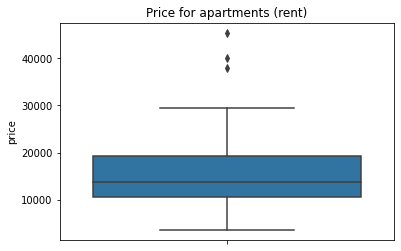

In [ ]:
p = sns.boxplot(y = df_prices[df_prices['for_sale'] == 0 ]['price'] )
p.set(title = 'Price for apartments (rent)')

plt.show()


For an investor it would be interesting to find areas where he can buy an apartment at a high price, but which he can rent at a high price.

### Outliers
Let's divide the data set in two, apartments for rent and apartments for sale.

In [ ]:
df_prices_sale = df_prices[df_prices['for_sale'] == 1]
df_prices_rent = df_prices[df_prices['for_sale'] == 0]

We are going to analyze the data of apartments for sale.

In [ ]:
df_prices_sale.describe()

,bathrooms,parking,price,rooms,size_m2,lat,lon,for_sale
count,171.000000,171.000000,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.0
mean,2.029240,1.654971,3.571126e+06,3.362573,92.515848,11.302298,-57.986448,1.0
std,0.777832,1.013565,2.197472e+06,1.525317,43.552640,9.551463,49.003749,0.0
min,0.000000,0.000000,6.150000e+05,0.000000,35.000000,0.000000,-99.190062,1.0
25%,2.000000,1.000000,2.130000e+06,2.000000,63.000000,0.000000,-99.163996,1.0
50%,2.000000,1.000000,2.907000e+06,3.000000,81.000000,19.306016,-99.133834,1.0
75%,3.000000,2.000000,4.560016e+06,4.000000,110.000000,19.327951,0.000000,1.0
max,5.000000,9.000000,1.600000e+07,10.000000,300.000000,19.356100,0.000000,1.0


We can see that we have apartments at 600,000, which is a very low price for an apartment. Perhaps an investment opportunity may exist here.

The outliers for apartment (sale) are

In [ ]:
from scipy.stats import iqr

df_prices_sale[df_prices_sale['price'] > 4560016 + 1.5 * iqr(df_prices_sale['price'])]

,bathrooms,parking,price,rooms,size_m2,ubication,lat,lon,for_sale
12,3.0,3.0,15000000.0,4.0,224.0,"Anillo Perif Blvd Adolfo López Mateos, Pedre...",0.000000,0.000000,1
138,0.0,0.0,16000000.0,1.0,50.0,"Calzada De Tlalpan, Ex-Ejido De Santa Ursula C...",19.301344,-99.147668,1
188,3.0,3.0,8800000.0,6.0,300.0,"Rinconada De Los Tules, Paseos De Taxqueña, Co...",0.000000,0.000000,1


In [ ]:
df_prices_rent.describe()

,bathrooms,parking,price,rooms,size_m2,lat,lon,for_sale
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,1.895349,1.546512,15370.360465,3.116279,88.441860,10.563202,-54.192549,0.0
std,0.651317,0.697170,7277.755108,1.192315,42.730236,9.678747,49.654971,0.0
min,0.000000,0.000000,3500.000000,1.000000,10.000000,0.000000,-99.192638,0.0
25%,2.000000,1.000000,10500.000000,2.000000,65.000000,0.000000,-99.162980,0.0
50%,2.000000,2.000000,13775.000000,3.000000,80.000000,19.304172,-99.131726,0.0
75%,2.000000,2.000000,19250.000000,4.000000,110.000000,19.334771,0.000000,0.0
max,3.000000,3.000000,45400.000000,6.000000,254.000000,19.356029,0.000000,0.0


We can see that we have apartments at 45000, which is a very high price for apartment rent. Perhaps an investment opportunity may exist here.

The outliers for apartment (rent) are

In [ ]:
df_prices_rent[df_prices_rent['price'] > 19250+ 1.5 * iqr(df_prices_rent['price'])]

,bathrooms,parking,price,rooms,size_m2,ubication,lat,lon,for_sale
146,3.0,2.0,40000.0,6.0,200.0,"Malintzin, Del Carmen, Coyoacán, Distrito Federal",19.352482,-99.160586,0
192,2.0,3.0,45400.0,5.0,254.0,"Villa Coyoacán, Coyoacán, Distrito Federal",19.303896,-99.175588,0
237,3.0,2.0,38000.0,3.0,210.0,"Malintzin 47, Del Carmen, Coyoacán, Distrito F...",19.352482,-99.160586,0


We will resume all the information

* Apartment (sale)

In [ ]:
possible_features = ['bathrooms', 'parking', 'price', 'rooms', 'size_m2']

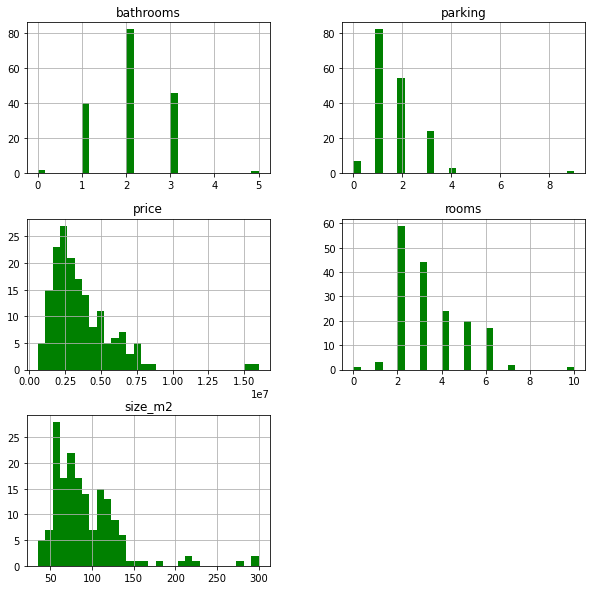

In [ ]:
df_prices_sale[possible_features].hist( bins = 30, figsize=(10,10), color='g')
plt.show()


* Apartment (rent)

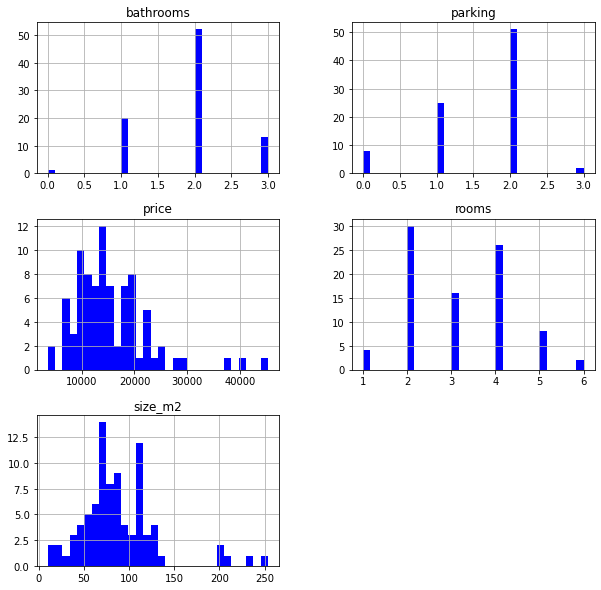

In [ ]:
df_prices_rent[possible_features].hist( bins = 30, figsize=(10,10), color='b')
plt.show()

Analyzing correlations

* Apartment (sale)

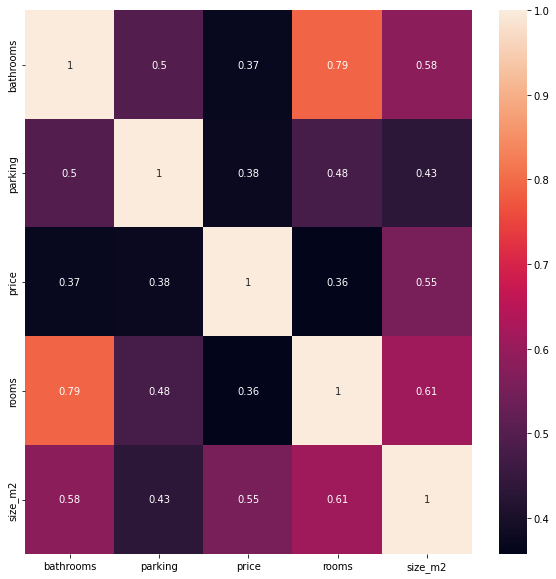

In [ ]:
correlations = df_prices_sale[possible_features].corr()
f, ax = plt.subplots( figsize = ( 10, 10 ) ) #Donde hay 1 son las variables con mayor correlacion
sns.heatmap( correlations, annot = True )
plt.show()

* We can see that the target variable (prices) is not strongly correlated with any other characteristic, which could indicate that the price depends on the location and not on the number of rooms or parking places, etc.

* Apartment (rent)

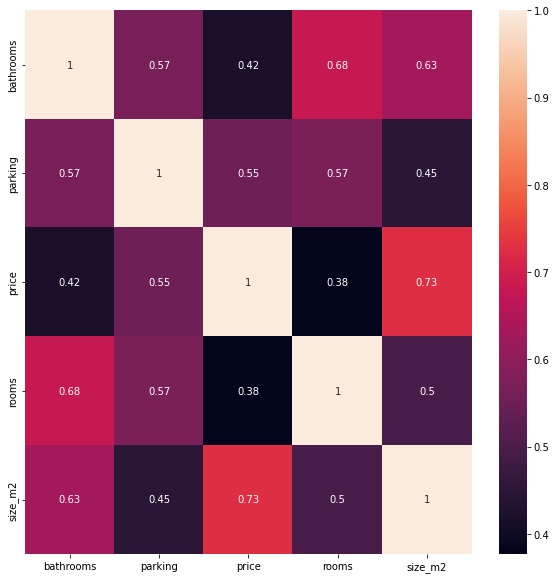

In [ ]:
correlations = df_prices_rent[possible_features].corr()
f, ax = plt.subplots( figsize = ( 10, 10 ) ) #Donde hay 1 son las variables con mayor correlacion
sns.heatmap( correlations, annot = True )
plt.show()



*  We can see that prices have a strong correlation with the size of the apartment, we will consider it for a machine learning model.

The features for the model will be:

In [ ]:

features3 = [ 'size_m2']

# Model <a name="model"></a>

We will try to make a model to predict prices based on the size of the rental apartments. This, as we could see, there is a strong correlation between these two variables.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

* First model

We are going to make a Polynomial regression model


In [ ]:
X = np.array( df_prices_rent[ features3 ] )
y = np.array( df_prices_rent['price'] )

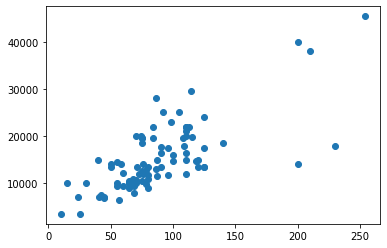

In [ ]:
plt.scatter(X,y)
plt.show()

Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

We should found the optimal degree for the polynomial. For this we will iterate over the degree and calculate the score over the train and the test set.

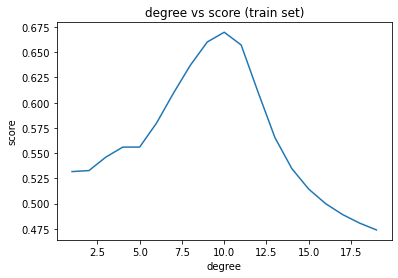

In [ ]:
scores = []
for i in range(1, 20):
  poly = PolynomialFeatures(degree = i)
  X_poly = poly.fit_transform(X_train)
  linear = LinearRegression()
  linear.fit(X_poly, y_train)
  scores.append( linear.score(X_poly, y_train))

plt.plot( range(1, 20), scores)
plt.title('degree vs score (train set)')
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

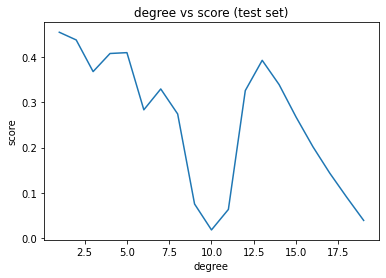

In [ ]:
scores = []
for i in range(1, 20):
  poly = PolynomialFeatures(degree = i)
  X_poly_test = poly.fit_transform(X_test)
  X_poly = poly.fit_transform(X_train)
  linear = LinearRegression()
  linear.fit(X_poly, y_train)
  scores.append( linear.score(X_poly_test, y_test))

plt.plot( range(1, 20), scores)
plt.title('degree vs score (test set)')
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

The graphs could indicate that the optimal degree for the polynomial regression is 2. Although in any case, the score does not seem promising.

In [ ]:
poly = PolynomialFeatures(degree = 2)
X_poly_test = poly.fit_transform(X_test)
X_poly = poly.fit_transform(X_train)
linear = LinearRegression()
linear.fit(X_poly, y_train)
linear.score(X_poly, y_train)

0.5327164813648526

In [ ]:
linear.score(X_poly_test, y_test)

0.4371660698219413

In fact the score for test and training set is so low, then this model is not good for the data

* Second model

From the scatter plot we can see that the linear regression is a possible good model for the data.

In [ ]:
lin = LinearRegression()
lin.fit(X_train, y_train)
lin.score(X_train, y_train)

0.5317110838273928

In [ ]:

lin.score(X_test, y_test)

0.4541309656868199

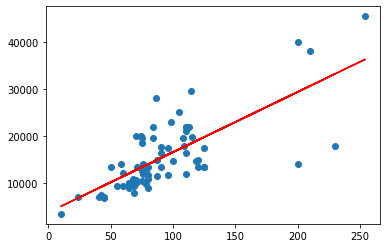

In [ ]:
plt.scatter(X_train,y_train)
plt.plot( X_train, lin.predict(X_train), color= 'r')
plt.show()

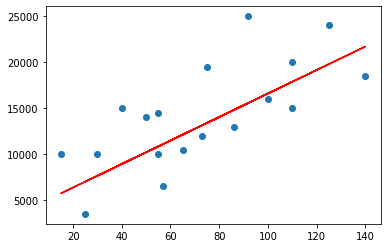

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test, lin.predict(X_test), color = 'r')
plt.show()

In this case the model has a low score, that indicates that the linear model is bad, this is obvious from the graphs.

We take the size column that has a strong correlation with the price of apartments, but the linear and polynomial models are bad. So the strong correlation found in the previous section could be because there are some outliers.

We will calculate the correlation again, but without outliers.

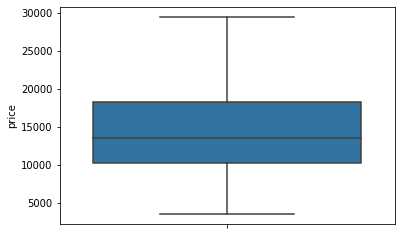

In [ ]:
df_prices_rent_no_outliers = df_prices_rent.drop([146, 192, 237], axis = 0)
sns.boxplot(y = 'price', data = df_prices_rent_no_outliers)
plt.show()

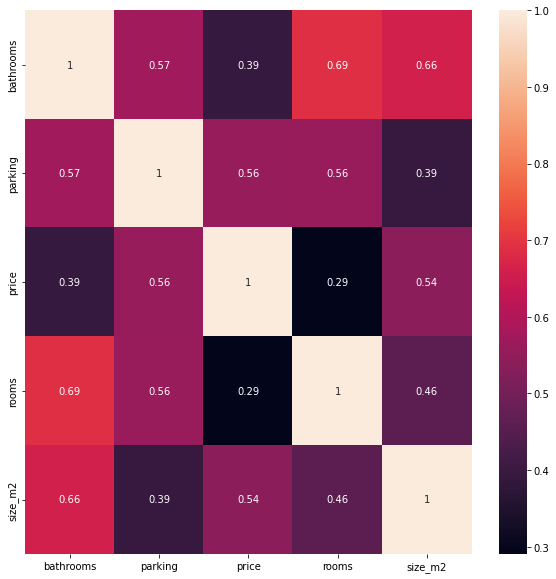

In [ ]:
correlations = df_prices_rent_no_outliers[possible_features].corr()
f, ax = plt.subplots( figsize = ( 10, 10 ) ) #Donde hay 1 son las variables con mayor correlacion
sns.heatmap( correlations, annot = True )
plt.show()

In fact we can see that without outliers there is not correlation between the price and the features. This is in both cases, rent and sale apartments. This suggest that the price is in relation with the location in both cases rent and sale.

# Analysis considering location <a name="location"></a>

Given what we found in the previous section, we can see that the price of the apartments does not have so much to do with size. This makes us think that the price has more to do with the location and places of interest in the area where the apartment is located.

We will consider the data with no zero longitude and latitude 

In [ ]:

df_prices_with_location = df_prices[df_prices['lat'] != 0.0 ].reset_index().drop('index', axis = 1)
df_prices_with_location


,bathrooms,parking,price,rooms,size_m2,ubication,lat,lon,for_sale
0,2.0,1.0,2800000.0,3.0,109.0,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",19.331492,-99.153093,1
1,3.0,3.0,7760936.0,3.0,109.0,"Avenida Universidad, Barrio Oxtopulco Universi...",19.349973,-99.179581,1
2,3.0,3.0,5926349.0,3.0,114.0,"Avenida Universidad, Barrio Oxtopulco Universi...",19.349973,-99.179581,1
3,1.0,1.0,2367000.0,2.0,60.0,"Anacahuita 90, Pedregal De Santo Domingo, Coyo...",19.330583,-99.171340,1
4,3.0,3.0,7358769.0,3.0,110.0,"Avenida Universidad, Barrio Oxtopulco Universi...",19.349973,-99.179581,1
...,...,...,...,...,...,...,...,...,...
142,3.0,2.0,17500.0,5.0,125.0,"Insurgentes Cuicuilco, Coyoacán, Distrito Federal",19.305854,-99.190062,0
143,1.0,1.0,2907000.0,2.0,50.0,"Miguel Ángel De Quevedo, Atlántida, Coyoacán, ...",19.342954,-99.149777,1
144,1.0,0.0,11500.0,3.0,87.0,"Avenida Universidad 1900, Oxtopulco Universid...",19.338103,-99.182827,0
145,3.0,2.0,19500.0,3.0,108.0,"Pacifico 155, Pueblo de los Reyes, Coyoacán, D...",19.339131,-99.151180,0


We will consider the principal neighbourhoods of Coyoacan. These could have a relation with the price of the apartments.

In [ ]:
neighbourhood = { 'Los Reyes' : [19.336267919884904, -99.1547938856558], 
                 'San Pedro Tepetlapa': [19.322798794659487, -99.14111300127189], 
                 'La Candelaria': [19.332351241349425, -99.14780508946625], 
                 'San Francisco Culhuacán': [19.33594061077364, -99.1176021337447], 
                 'Santa Úrsula Coapa': [19.311027981789238, -99.14402381634187], 
                 'San Francisco': [19.338085875292126, -99.11693533097588], 
                 'El Niño Jesús': [19.342215906169912, -99.15914828863926], 
                 'La Conchita': [19.347225600306057, -99.15862158309838], 
                 'San Lucas': [19.349540289032685, -99.15108165796187], 
                 'Santa Catarina': [19.348070893949924, -99.17326511154934]}

In [ ]:
list_barrios = list(neighbourhood.keys())

In [ ]:
address = 'Coyoacan, Ciudad de Mexico'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Coyoacan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Coyoacan are 19.3500942, -99.1623319.


In [ ]:
latitudes = []
longitudes = []
barrios = []

import folium
# create map of New York using latitude and longitude values
map_coyoacan = folium.Map(location=[latitude, longitude], zoom_start=13)
folium.Marker([latitude, longitude], popup='Coyoacan').add_to(map_coyoacan)
# add markers to map
for lat, lng, sale, price in zip(df_prices_with_location['lat'], df_prices_with_location['lon'], df_prices_with_location['for_sale'], df_prices_with_location['price']):
    if sale == 1:

      folium.CircleMarker(
          [lat, lng],
          radius=2 * (price / 1000000),
          color='blue',
          fill=True,
          fill_color='#3186cc',
          fill_opacity=0.7,
          parse_html=False).add_to(map_coyoacan)  
    else:
      folium.CircleMarker(
          [lat, lng],
          radius=2 * (price / 10000),
          color='orange',
          fill=True,
          fill_color='orange',
          fill_opacity=0.7,
          parse_html=False).add_to(map_coyoacan) 


for i in range(len(list_barrios)):
    latitudes.append(neighbourhood[list_barrios[i]][0])
    longitudes.append(neighbourhood[list_barrios[i]][1])
    barrios.append(list_barrios[i])

for lat, lon, barrio in zip(latitudes, longitudes, barrios):
    label = '{}'.format(barrio)
    label = folium.Popup(label, parse_html=True)
    #folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_berlin) 
    folium.Circle([lat, lon], radius=400, color='red', fill=False, popup= label).add_to(map_coyoacan)

    #folium.Marker([lat, lon]).add_to(map_berlin)
map_coyoacan

In this map the blue circles are the sale apartments and the orange circles are the rent apartments. The size of the circles is in proportion with the price. The red circles are the principal neighbourhoods of Coyoacan. 

* We can see that the biggest circles are near to the greats avenues like 'Calzada de Tlalpan' or 'Circuito interior'. This makes us think that the idea about the price is in relation with the location is good

We are going to obtain the information about the interesting places in the zone with foursquare.

In [216]:
import requests
from pandas.io.json import json_normalize

CLIENT_ID = 'IN51BRT2QGA0SLEQQAVZXDFUP1GFL1QWUCDFT1KYUCLTYTEJ' # your Foursquare ID
CLIENT_SECRET = '2BQWKAXKAWRDLPFVFVKXJTYZSHMGATVY5DZCFNHCYNXNSTPW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

lat = latitude
lon =  longitude
LIMIT = 500
radius = 5000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, lat,lon, radius, LIMIT)

# gettig the venues data form Forsquare API in json 

results = requests.get(url).json()

In [217]:
venues = results['response']['groups'][0]['items']
venues_df = json_normalize(venues) # flatten JSON
venues_df.shape

(100, 24)

In [218]:
# filter columns
cols = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
venues_df = venues_df.loc[:, cols]
# to show whole text in columns in dataframe python: https://stackoverflow.com/a/25352191
pd.set_option("display.max_colwidth" , -1)
venues_df.shape

(100, 4)

In [219]:
pd.reset_option('display.max_colwidth')

In [220]:
venues_df['venue.categories'] = venues_df.apply(lambda x: x['venue.categories'][0]['name'], axis=1)
venues_df.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Coyoacán,Neighborhood,19.349643,-99.163208
1,El Kiosko de Coyoacán,Plaza,19.349964,-99.162764
2,Tierra Garat Coyoacán,Coffee Shop,19.349609,-99.160795
3,Mercado de Coyoacán,Market,19.352669,-99.161498
4,Tostadas Amatista,Mexican Restaurant,19.351255,-99.163793


Renaming the columns

In [224]:
# clean columns
venues_df.columns = [col.split(".")[-1] for col in venues_df.columns]
venues_df

,name,categories,lat,lng
0,Coyoacán,Neighborhood,19.349643,-99.163208
1,El Kiosko de Coyoacán,Plaza,19.349964,-99.162764
2,Tierra Garat Coyoacán,Coffee Shop,19.349609,-99.160795
3,Mercado de Coyoacán,Market,19.352669,-99.161498
4,Tostadas Amatista,Mexican Restaurant,19.351255,-99.163793
...,...,...,...,...
95,Sonora Grill Prime,Steakhouse,19.368419,-99.180659
96,San Angel,Neighborhood,19.345892,-99.190173
97,Steelwood Guitars,Music Store,19.376253,-99.155330
98,Mercado del Carmen,Market,19.346467,-99.190504


We can see that the venues categories are

In [ ]:
venues_df['categories'].unique()

array(['Neighborhood', 'Plaza', 'Coffee Shop', 'Market',
       'Mexican Restaurant', 'Spanish Restaurant', 'Ice Cream Shop',
       'Art Museum', 'Café', 'Burger Joint', 'Bakery', 'Track',
       'Italian Restaurant', 'Flower Shop', 'Food Truck',
       'Breakfast Spot', 'Park', 'Mediterranean Restaurant',
       'Garden Center', 'Athletics & Sports', 'Indie Movie Theater',
       'Art Gallery', 'Concert Hall', 'Sports Club', 'Department Store',
       'History Museum', 'Pet Store', 'BBQ Joint', 'Movie Theater',
       'Shopping Mall', 'Multiplex', 'Middle Eastern Restaurant',
       'Bookstore', 'Argentinian Restaurant', 'Golf Course', 'University',
       'Chocolate Shop', 'French Restaurant', 'Performing Arts Venue',
       'Japanese Restaurant', 'College Arts Building',
       'Sporting Goods Shop', 'Food Court', 'Music School', 'Theater',
       'Brewery', 'Jazz Club', 'Chinese Restaurant', 'Seafood Restaurant',
       'Vegetarian / Vegan Restaurant', 'Liquor Store', 'Spa',
     

In [ ]:
latitudes = []
longitudes = []
for i in range(len(venues_df)):
  latitudes.append(venues_df['lat'][i])
  longitudes.append(venues_df['lng'][i])

In [265]:
map_coyoacan = folium.Map(location=[latitude, longitude], zoom_start=13)
for lat, lon in zip(latitudes, longitudes):
  
    #folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_berlin) 
    folium.Circle([lat, lon], radius=100, color='green', fill=True).add_to(map_coyoacan)

    #folium.Marker([lat, lon]).add_to(map_berlin)
map_coyoacan

The most of the interesting places are located at north of coyoacan. We are going to analyze if this is in relation with the price of the apartments.

In [145]:
def get_near_by_venues(name, rooms, bathrooms, parking, price, for_sale, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for  name, rooms, bathrooms, parking, price, for_sale, lat, lng in zip(name, rooms, bathrooms, parking, price, for_sale, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, rooms, bathrooms, parking, price, for_sale, lat, lng, 
                             v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],
                             v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue in venues_list for item in venue])
    nearby_venues.columns = ['ubication', 'rooms', 'bathrooms', 'parking', 'price', 'for_sale', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return nearby_venues

In [146]:
donwntown_venues = get_near_by_venues(df_prices_with_location['ubication'], df_prices_with_location['rooms'], df_prices_with_location['bathrooms'], df_prices_with_location['parking'], df_prices_with_location['price'], df_prices_with_location['for_sale'], latitudes=df_prices_with_location['lat'],
                                   longitudes=df_prices_with_location['lon'])

In [147]:
print(donwntown_venues.shape)
donwntown_venues.head()

(5890, 12)


,ubication,rooms,bathrooms,parking,price,for_sale,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",3.0,2.0,1.0,2800000.0,1,19.331492,-99.153093,Disfraces Dario's Aztecas,19.331839,-99.152884,Costume Shop
1,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",3.0,2.0,1.0,2800000.0,1,19.331492,-99.153093,Gorditas las güeras,19.334706,-99.156337,Restaurant
2,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",3.0,2.0,1.0,2800000.0,1,19.331492,-99.153093,Nutrisa Plaza Cantil,19.328893,-99.153650,Ice Cream Shop
3,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",3.0,2.0,1.0,2800000.0,1,19.331492,-99.153093,SALÓN BRESCIA,19.331591,-99.153026,Lounge
4,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",3.0,2.0,1.0,2800000.0,1,19.331492,-99.153093,Marquesitas del Mayab,19.327394,-99.154726,Food Truck


In [148]:
print('There are {} uniques categories.'.format(len(donwntown_venues['Venue Category'].unique())))
print('\n\nVenues returned for each neighbourhood: ')
donwntown_venues['Venue Category'].value_counts().to_frame()

There are 223 uniques categories.


Venues returned for each neighbourhood: 


,Venue Category
Mexican Restaurant,519
Taco Place,396
Ice Cream Shop,228
Coffee Shop,207
Restaurant,177
...,...
Campground,1
Korean Restaurant,1
Squash Court,1
Optical Shop,1


One hot encoding of venue categories columns

In [189]:

downtown_onehot = pd.get_dummies(donwntown_venues[['Venue Category']], prefix= "", prefix_sep= " ")

downtown_onehot['ubication'] = donwntown_venues['ubication'] 
downtown_onehot['price'] = donwntown_venues['price'] 
downtown_onehot['rooms'] = donwntown_venues['rooms'] 
downtown_onehot['bathrooms'] = donwntown_venues['bathrooms'] 
downtown_onehot['parking'] = donwntown_venues['parking'] 
downtown_onehot['for_sale'] = donwntown_venues['for_sale'] 
downtown_onehot['lat'] = donwntown_venues['Neighbourhood Latitude']
downtown_onehot['lon'] = donwntown_venues['Neighbourhood Longitude']

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]
print(downtown_onehot.shape)
downtown_onehot.head()

(5890, 231)


,lon,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Cafeteria,...,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Stationery Store,Steakhouse,Street Art,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Tree,University,Vegetarian / Vegan Restaurant,Video Game Store,Volleyball Court,Wine Bar,Wings Joint,Women's Store,Yoga Studio,ubication,price,rooms,bathrooms,parking,for_sale,lat
0,-99.153093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",2800000.0,3.0,2.0,1.0,1,19.331492
1,-99.153093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",2800000.0,3.0,2.0,1.0,1,19.331492
2,-99.153093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",2800000.0,3.0,2.0,1.0,1,19.331492
3,-99.153093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",2800000.0,3.0,2.0,1.0,1,19.331492
4,-99.153093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Avenida Aztecas, Pueblo de los Reyes, Coyoacán...",2800000.0,3.0,2.0,1.0,1,19.331492


We wil agroup the data by the location

In [190]:
downtown_grouped = downtown_onehot.groupby(['ubication', 'price', 'for_sale', 'parking', 'rooms', 'bathrooms', 'lat', 'lon']).mean().reset_index()
print(downtown_grouped.shape)
downtown_grouped.head()

(143, 231)


,ubication,price,for_sale,parking,rooms,bathrooms,lat,lon,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,...,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Stationery Store,Steakhouse,Street Art,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Tree,University,Vegetarian / Vegan Restaurant,Video Game Store,Volleyball Court,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Aguayo, Del Carmen, Coyoacán, Distrito Federal",18000.0,0,1.0,4.0,2.0,19.351026,-99.162637,0.0,0.0,0.0,0.0,0.01,0.01,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030000,0.1,0.0,0.01,0.010000,0.0,0.0,0.0,0.02,0.03,0.0,0.0,0.000000,0.01,0.01,0.0,0.01,...,0.0,0.0,0.01,0.010000,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.01,0.000000,0.0,0.040000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.01,0.000000,0.0,0.0
1,"Ajusco, Coyoacán, Distrito Federal",10000.0,0,0.0,2.0,2.0,19.319090,-99.160961,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.0,0.00,...,0.0,0.0,0.00,0.041667,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.041667,0.0,0.00,0.000000,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.083333,0.000000,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.0
2,"Ajusco, Coyoacán, Distrito Federal",2736000.0,1,1.0,2.0,2.0,19.319090,-99.160961,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.0,0.00,...,0.0,0.0,0.00,0.041667,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.041667,0.0,0.00,0.000000,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.083333,0.000000,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.0
3,"Alba, Insurgentes Cuicuilco, Coyoacán, Distrit...",5750000.0,1,2.0,4.0,2.0,19.305894,-99.182976,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.0,0.00,...,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.2,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.200000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.0
4,"Alianza Popular 1, Alianza Popular Revoluciona...",2260000.0,1,1.0,3.0,1.0,19.310205,-99.119890,0.0,0.0,0.0,0.0,0.00,0.00,0.054054,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.027027,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.027027,0.00,0.00,0.0,0.00,...,0.0,0.0,0.00,0.027027,0.0,0.0,0.0,0.0,0.00,0.027027,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.027027,0.0,0.081081,0.027027,0.0,0.0,0.0,0.0,0.0,0.027027,0.000000,0.027027,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.027027,0.0,0.0


In [191]:
venues = list( set(downtown_grouped.columns) - {'ubication', 'lat', 'lon', 'price', 'rooms', 'bathrooms', 'parking', 'for_sale'})


In [192]:
def return_most_common_venues(row, num_top_venues):
    row = row.iloc[1:]
    row_sorted = row.sort_values(ascending=False)
    
    return row_sorted.index.values[0:num_top_venues]


The final data includes the location, number of rooms, bathrooms and parking spaces. It also includes information on places near the apartment and if the apartment is for rent or sale.

In [193]:
downtown_grouped

,ubication,price,for_sale,parking,rooms,bathrooms,lat,lon,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,...,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Stationery Store,Steakhouse,Street Art,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Tree,University,Vegetarian / Vegan Restaurant,Video Game Store,Volleyball Court,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Aguayo, Del Carmen, Coyoacán, Distrito Federal",18000.0,0,1.0,4.0,2.0,19.351026,-99.162637,0.0,0.0,0.0,0.000000,0.010000,0.01,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.030000,0.100000,0.0,0.01,0.010000,0.000000,0.0,0.0,0.02,0.03,0.0,0.0,0.000000,0.010000,0.01,0.0,0.01,...,0.0,0.0,0.01,0.010000,0.0,0.0,0.0,0.000000,0.01,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.01,0.000000,0.0,0.040000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.01,0.000000,0.0,0.0
1,"Ajusco, Coyoacán, Distrito Federal",10000.0,0,0.0,2.0,2.0,19.319090,-99.160961,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.041667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.041667,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.00,...,0.0,0.0,0.00,0.041667,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.041667,0.0,0.00,0.000000,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.083333,0.000000,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.0
2,"Ajusco, Coyoacán, Distrito Federal",2736000.0,1,1.0,2.0,2.0,19.319090,-99.160961,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.041667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.041667,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.00,...,0.0,0.0,0.00,0.041667,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.041667,0.0,0.00,0.000000,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.083333,0.000000,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.0
3,"Alba, Insurgentes Cuicuilco, Coyoacán, Distrit...",5750000.0,1,2.0,4.0,2.0,19.305894,-99.182976,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.00,...,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.200000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.200000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.0
4,"Alianza Popular 1, Alianza Popular Revoluciona...",2260000.0,1,1.0,3.0,1.0,19.310205,-99.119890,0.0,0.0,0.0,0.000000,0.000000,0.00,0.054054,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.027027,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.027027,0.000000,0.00,0.0,0.00,...,0.0,0.0,0.00,0.027027,0.0,0.0,0.0,0.000000,0.00,0.027027,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.027027,0.0,0.081081,0.027027,0.0,0.0,0.0,0.0,0.0,0.027027,0.000000,0.027027,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.027027,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,"Villa Coyoacán, Coyoacán, Distrito Federal",45400.0,0,3.0,5.0,2.0,19.

## Model with location

We are going to apply a clustering algorithm on the data. 
This could give us information about the relationship between price and location.

In [195]:
rent = downtown_grouped[downtown_grouped['for_sale'] == 0]
sale = downtown_grouped[downtown_grouped['for_sale'] == 1]

* Rent

We are going to apply the elbow method to obtain the optimal number of clusters.

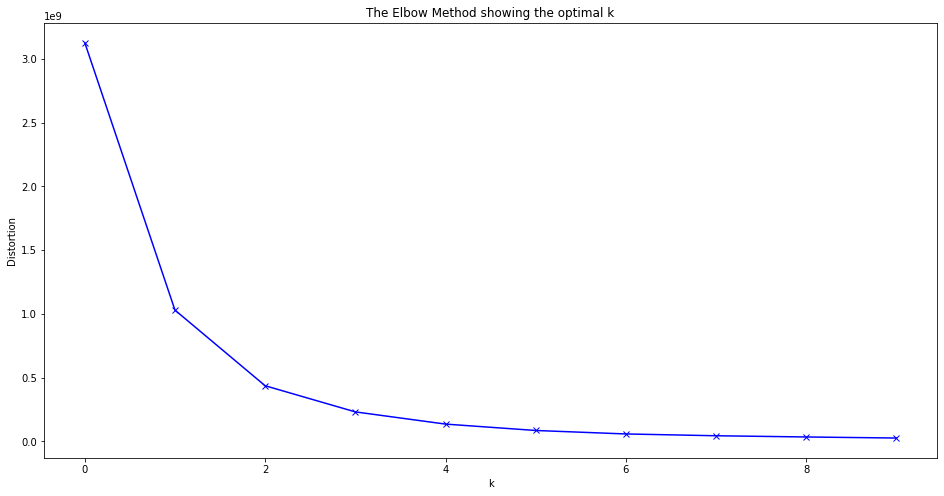

In [196]:
from sklearn.cluster import KMeans

distortions = []
X = rent.drop(['ubication', 'lat', 'lon'], axis = 1)
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(X)
  distortions.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The optimal number of clusters is 2. We are going to train the model with this.

In [206]:
kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [207]:
y = kmeans.predict(X)
rent['label'] = y

In [208]:
rent.head()

,ubication,price,for_sale,parking,rooms,bathrooms,lat,lon,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,...,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Stationery Store,Steakhouse,Street Art,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Tree,University,Vegetarian / Vegan Restaurant,Video Game Store,Volleyball Court,Wine Bar,Wings Joint,Women's Store,Yoga Studio,label
0,"Aguayo, Del Carmen, Coyoacán, Distrito Federal",18000.0,0,1.0,4.0,2.0,19.351026,-99.162637,0.0,0.0,0.0,0.0,0.01,0.01,0.00000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.0,0.030000,0.1,0.0,0.01,0.01,0.0,0.0,0.0,0.02,0.03000,0.0,0.0,0.0,0.01,0.01,0.0,0.01,...,0.0,0.01,0.010000,0.0,0.0,0.00000,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.01,0.0,0.0,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.01,0.0,0.0,0.01,0.000000,0.0,0.01,0.0,0.0,0.0,0
1,"Ajusco, Coyoacán, Distrito Federal",10000.0,0,0.0,2.0,2.0,19.319090,-99.160961,0.0,0.0,0.0,0.0,0.00,0.00,0.00000,0.041667,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.0,0.041667,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00000,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.041667,0.0,0.0,0.00000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.00,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0
9,"Arroyo, Jardines Del Pedregal De San Ángel, Co...",9000.0,0,1.0,2.0,1.0,19.309634,-99.192638,0.0,0.0,0.0,0.0,0.00,0.00,0.00000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00000,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.000000,0.0,0.0,0.00000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0
16,"Av. Pacífico, El Rosedal, Coyoacán, Distrito F...",15000.0,0,2.0,5.0,3.0,19.338603,-99.151204,0.0,0.0,0.0,0.0,0.00,0.00,0.02439,0.000000,0.000000,0.0,0.02439,0.0,0.0,0.04878,0.0,0.097561,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.02439,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.000000,0.0,0.0,0.02439,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.073171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0
18,"Av. Paseo De Los Jardines, Paseos De Taxqueña,...",10000.0,0,1.0,3.0,2.0,19.343963,-99.126218,0.0,0.0,0.0,0.0,0.00,0.00,0.00000,0.000000,0.083333,0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00000,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.000000,0.0,0.0,0.00000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.083333,0.0,0.00,0.0,0.0,0.0,0


In [209]:
rent.groupby(['label']).describe()

price                                      ...  Yoga Studio                    
      count          mean          std      min  ...          25%  50%  75%       max
label                                            ...                                 
0      42.0  13880.952381  4610.036141   3500.0  ...          0.0  0.0  0.0  0.021277
1       4.0  37850.000000  7272.551134  28000.0  ...          0.0  0.0  0.0  0.000000

[2 rows x 1840 columns]

We can see that the two labels divides the data in two clases, 0 for low rental prices and 1 for high rental prices. Remember that an investor could be interested in high rental prices to
get the best profit.

In [261]:
latitudes = []
longitudes = []
barrios = []

import folium
# create map of New York using latitude and longitude values
map_coyoacan = folium.Map(location=[latitude, longitude], zoom_start=13)
folium.Marker([latitude, longitude], popup='Coyoacan').add_to(map_coyoacan)
# add markers to map
for lat, lng, price, label in zip(rent['lat'], rent['lon'], rent['price'], rent['label']):
    
      if label == 0:
        folium.CircleMarker(
            [lat, lng],
            radius=2 * (price / 1000),
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            parse_html=False).add_to(map_coyoacan)

      if label == 1:
        folium.CircleMarker(
            [lat, lng],
            radius=2 * (price / 1000),
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=0.5,
            parse_html=False).add_to(map_coyoacan) 

latitudes = []
longitudes = []
for i in range(len(venues_df)):
  latitudes.append(venues_df['lat'][i])
  longitudes.append(venues_df['lng'][i])

for lat, lon in zip(latitudes, longitudes):
  
    #folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_berlin) 
    folium.Circle([lat, lon], radius=100, color='green', fill=True).add_to(map_coyoacan)



map_coyoacan

In this the blue circles are the label 0, the lowest prices for rent and the orange circles are the label 1, the highest prices for rent. We can see the the highest prices are at north and south near to great avenues. We are interested in the apartments located at north because here are the interesting places. Now we are goint to analyze the prices of sale apartments.

* Sale

Again we are going to apply the elbow method

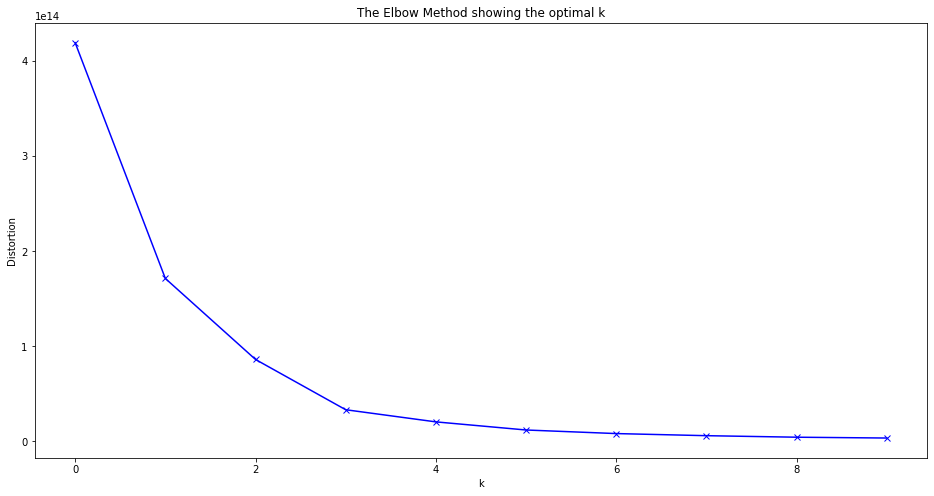

In [227]:


distortions = []
X = sale.drop('ubication', axis = 1)
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(X)
  distortions.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The optimal number of cluster is 2.

In [228]:
kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [229]:
y = kmeans.predict(X)
sale['label'] = y

In [230]:
sale.head()

,ubication,price,for_sale,parking,rooms,bathrooms,lat,lon,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,...,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Stationery Store,Steakhouse,Street Art,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Tree,University,Vegetarian / Vegan Restaurant,Video Game Store,Volleyball Court,Wine Bar,Wings Joint,Women's Store,Yoga Studio,label
2,"Ajusco, Coyoacán, Distrito Federal",2736000.0,1,1.0,2.0,2.0,19.319090,-99.160961,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.000000,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,"Alba, Insurgentes Cuicuilco, Coyoacán, Distrit...",5750000.0,1,2.0,4.0,2.0,19.305894,-99.182976,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.200000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
4,"Alianza Popular 1, Alianza Popular Revoluciona...",2260000.0,1,1.0,3.0,1.0,19.310205,-99.119890,0.0,0.0,0.0,0.0,0.0,0.0,0.054054,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.027027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027027,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.027027,0.0,0.0,0.0,0.0,0.0,0.027027,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.027027,0.0,0.081081,0.027027,0.0,0.0,0.0,0.0,0.0,0.027027,0.000000,0.027027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027027,0.0,0.0,0
5,"Amatl, Pedregal De Santo Domingo, Coyoacán, Di...",1367200.0,1,1.0,2.0,1.0,19.322045,-99.169134,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.066667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.066667,0.0,0.0,0.0,...,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
6,"Anacahuita 90, Pedregal De Santo Domingo, Coyo...",2367000.0,1,1.0,2.0,1.0,19.330583,-99.171340,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.153846,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0


In [231]:
sale.groupby(['label']).describe()

price                                         ...  Yoga Studio                     
      count          mean           std        min  ...          25%  50%   75%       max
label                                               ...                                  
0      86.0  2.765447e+06  1.042875e+06   628044.0  ...          0.0  0.0  0.00  0.032258
1      11.0  7.808408e+06  2.809455e+06  5750000.0  ...          0.0  0.0  0.02  0.020000

[2 rows x 1840 columns]

We can see that the two labels divides the data in two clases, 0 for low sale p prices and 1 for high sale prices. Remember that an investor could be interested in low sale prices to get the best profit.

In [238]:
latitudes = []
longitudes = []
barrios = []

import folium
# create map of New York using latitude and longitude values
map_coyoacan = folium.Map(location=[latitude, longitude], zoom_start=13)
folium.Marker([latitude, longitude], popup='Coyoacan').add_to(map_coyoacan)
# add markers to map
for lat, lng, price, label in zip(sale['lat'], sale['lon'], sale['price'], sale['label']):
    
      if label == 0:
        folium.CircleMarker(
            [lat, lng],
            radius=2 * (price / 1000000),
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            parse_html=False).add_to(map_coyoacan)

      if label == 1:
        folium.CircleMarker(
            [lat, lng],
            radius=2 * (price / 1000000),
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=0.5,
            parse_html=False).add_to(map_coyoacan) 

latitudes = []
longitudes = []
for i in range(len(venues_df)):
  latitudes.append(venues_df['lat'][i])
  longitudes.append(venues_df['lng'][i])
  
for lat, lon in zip(latitudes, longitudes):
  
    #folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_berlin) 
    folium.Circle([lat, lon], radius=100, color='green', fill=True).add_to(map_coyoacan)



map_coyoacan

In this the blue circles are the label 0, the lowest prices for sale and the orange circles are the label 1, the highest prices for sale. We can see the  lowest prices are at north. This is so good because at this zone are the apartments with the highest rental prices, the perfect combination. This coincides with the location of the interesting places. Our theory was right, the best zone for invest in an apartment for rental is in correlation with the location.

## Conclusions


We will mark the area of ​​our interest for investment

In [260]:
mapObj = folium.Map(location=[latitude, longitude], zoom_start=12)
# -RENT
# Blue circles indicates apartments with highest rent
for lat, lng, price, label in zip(rent['lat'], rent['lon'], rent['price'], rent['label']):
    
      if label == 0:
        folium.CircleMarker(
            [lat, lng],
            radius=2 * (price / 1000),
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=0.7,
            parse_html=False).add_to(mapObj)

      if label == 1:
        folium.CircleMarker(
            [lat, lng],
            radius=2 * (price / 1000),
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.5,
            parse_html=False).add_to(mapObj) 


# SALE 
# Blue circles indicates apartments with lowest sale price

for lat, lng, price, label in zip(sale['lat'], sale['lon'], sale['price'], sale['label']):
    
      if label == 0:
        folium.CircleMarker(
            [lat, lng],
            radius=2 * (price / 1000000),
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            parse_html=False).add_to(mapObj)

      if label == 1:
        folium.CircleMarker(
            [lat, lng],
            radius=2 * (price / 1000000),
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=0.5,
            parse_html=False).add_to(mapObj) 


# Venues
latitudes = []
longitudes = []
for i in range(len(venues_df)):
  latitudes.append(venues_df['lat'][i])
  longitudes.append(venues_df['lng'][i])
  
for lat, lon in zip(latitudes, longitudes):
  
    #folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_berlin) 
    folium.Circle([lat, lon], radius=100, color='green', fill=True).add_to(mapObj)

shapesLayer = folium.FeatureGroup(name="Vector Shapes").add_to(mapObj)

# create a polyline with the coordinates
folium.PolyLine([(19.367397674258896, -99.18056674694347), (19.3584093504478, -99.16451640880653), (19.357194674091673, -99.13190074842134), (19.329011643978244, -99.13825221912792), (19.337758622340772, -99.1797084400912), (19.367397674258896, -99.18056674694347)],
                color="red",
                weight=5).add_to(shapesLayer)

# display the layer switcher widget
folium.LayerControl().add_to(mapObj)

mapObj

In this map, as in the previous ones, the green circles indicate places of interest (restaurants, cafes, etc.). The blue circles are points where there are apartments for sale with the lowest prices and apartments for rent with the highest prices. While the orange circles are points where there are apartments for sale with high prices and apartments for rent with low prices. 

In the red polygon, there would be a great investment opportunity, since it presents a great density of places of interest, at the same time that it presents a great density of blue points. Which indicates that you could buy apartments at the lowest prices in the area and put them up for rent at the highest prices in the area. In addition, the size of the orange circles is medium, which indicates that also, in this area, the highest prices for sale, these are not the highest and the lowest prices for rent, these are not the Lower. For these reasons we believe that this area presents the best investment opportunity for someone who wants to invest in real estate.